<a href="https://colab.research.google.com/github/Manu-Sanchez/Learning/blob/ai%2Fbasic-gan/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as func
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [3]:
CIFAR_train_data = datasets.CIFAR10("../data", train=1, download=1, transform=transforms.ToTensor())
CIFAR_test_data = datasets.CIFAR10("../data", train=0, download=1, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [4]:
CIFAR_train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
CIFAR_test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [17]:
train_data = DataLoader(CIFAR_train_data, batch_size=100, shuffle=True)
test_data = DataLoader(CIFAR_test_data, batch_size=1000, shuffle=False)

In [21]:
for img_batch, img_label in train_data:
  break

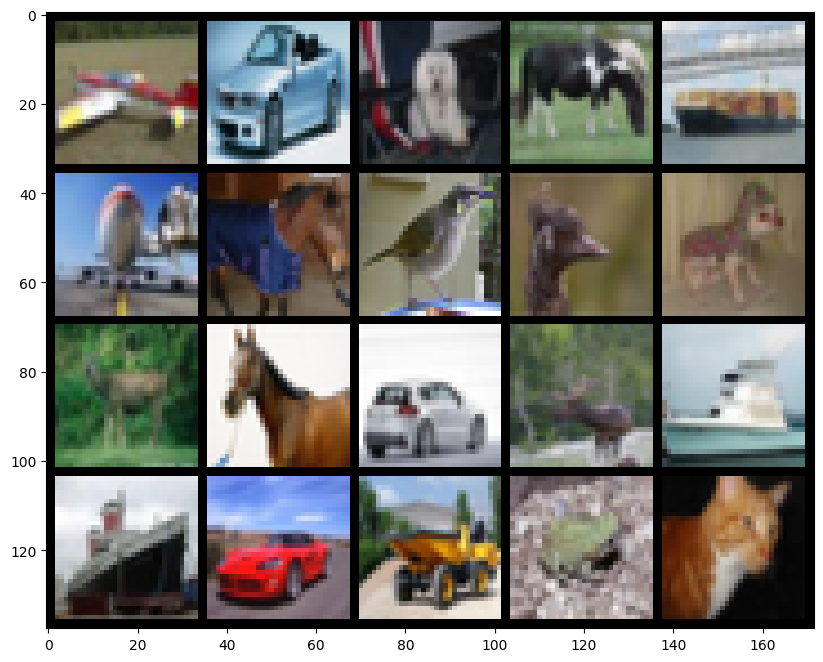

In [34]:
img_grid = make_grid(img_batch[:20], nrow=5)
plt.figure(figsize=(25,8))
plt.imshow(img_grid.permute(1,2,0))

In [35]:
img_batch[0].shape

torch.Size([3, 32, 32])

In [62]:
class CIFARConvolutionalModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 6, 5, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(6*6*16, 120) #Img size (6,6) * 16 (features) (6 comes from 32 - 2 (conv2d) = 30 // 2 (pooling) = 15 - 2 (conv2d) = 13 // 2 = 6 (pooling)))
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, x):
    x = func.relu(self.conv1(x))
    x = func.max_pool2d(x, 2, 2)
    x = func.relu(self.conv2(x))
    x = func.max_pool2d(x, 2, 2)
    x = x.reshape(-1, 6*6*16)
    x = func.relu(self.fc1(x))
    x = func.relu(self.fc2(x))
    x = self.fc3(x)

    return func.log_softmax(x, dim=1)

model = CIFARConvolutionalModel()
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

In [38]:
model

CIFARConvolutionalModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [39]:
for param in model.parameters():
  print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [63]:
epochs = 10

train_loss = []
validation_loss = []

train_hits = []
validation_hits = []

for epoch in range(epochs):
  train_batch_hits = 0
  validation_batch_hits = 0

  for batch_idx, (x_tr, y_tr) in enumerate(train_data):

    y_pred = model(x_tr)
    loss = criterion(y_pred, y_tr)

    optim.zero_grad()
    loss.backward()
    optim.step()

    hits = (torch.max(y_pred.data, 1)[1] == y_tr).sum()
    train_batch_hits += hits

    if batch_idx%20 == 0:
      print(f"Epoch {epoch} Batch {batch_idx} Loss {loss}")

  train_hits.append(train_batch_hits)
  train_loss.append(loss)

  with torch.no_grad():
    for batch_idx, (x_ts, y_ts) in enumerate(test_data):

      y_pred = model(x_ts)
      loss = criterion(y_pred, y_ts)

      hits = (torch.max(y_pred.data, 1)[1] == y_ts).sum()
      validation_batch_hits += hits

    validation_hits.append(validation_batch_hits)
    validation_loss.append(loss)

  print("="*10 + f" Epoch {epoch} Summary " + "="*10)
  print(f"Train Hits: {train_batch_hits} out of 50000")
  print(f"Train Accuracy: {train_batch_hits / 50000 * 100}")

  print(f"Test Hits: {validation_batch_hits} out of 10000")
  print(f"Test Accuracy: {validation_batch_hits / 10000 * 100}")


Epoch 0 Batch 0 Loss 2.3052141666412354
Epoch 0 Batch 20 Loss 2.3056070804595947
Epoch 0 Batch 40 Loss 2.161639451980591
Epoch 0 Batch 60 Loss 2.0854477882385254
Epoch 0 Batch 80 Loss 2.0413990020751953
Epoch 0 Batch 100 Loss 2.083883762359619
Epoch 0 Batch 120 Loss 2.056814670562744
Epoch 0 Batch 140 Loss 1.9564790725708008
Epoch 0 Batch 160 Loss 1.8595092296600342
Epoch 0 Batch 180 Loss 1.945062279701233
Epoch 0 Batch 200 Loss 1.8497378826141357
Epoch 0 Batch 220 Loss 1.7358016967773438
Epoch 0 Batch 240 Loss 1.8082507848739624
Epoch 0 Batch 260 Loss 1.7440516948699951
Epoch 0 Batch 280 Loss 1.6295897960662842
Epoch 0 Batch 300 Loss 1.708351492881775
Epoch 0 Batch 320 Loss 1.7427700757980347
Epoch 0 Batch 340 Loss 1.658835768699646
Epoch 0 Batch 360 Loss 1.448614239692688
Epoch 0 Batch 380 Loss 1.745090126991272
Epoch 0 Batch 400 Loss 1.4940348863601685
Epoch 0 Batch 420 Loss 1.6545279026031494
Epoch 0 Batch 440 Loss 1.558864712715149
Epoch 0 Batch 460 Loss 1.3717551231384277
Epoch 0

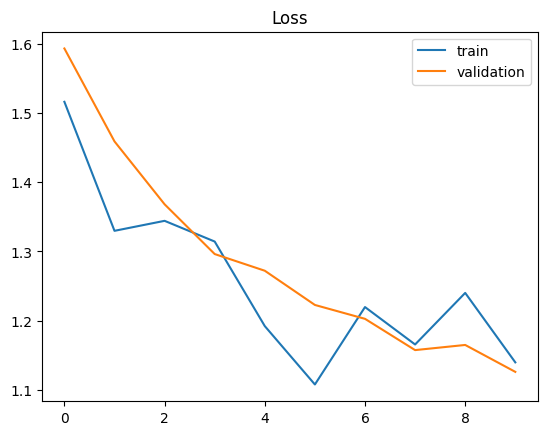

In [68]:
plt.plot([loss.detach().numpy() for loss in train_loss], label='train')
plt.plot([loss.detach().numpy() for loss in validation_loss], label='validation')
plt.title('Loss')
plt.legend()
plt.show()

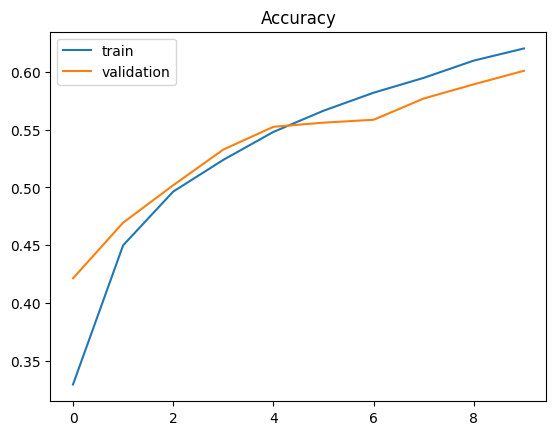

In [70]:
plt.plot([hit/50000 for hit in train_hits], label="train")
plt.plot([hit/10000 for hit in validation_hits], label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()